<a href="https://colab.research.google.com/github/yohanesnuwara/volve-machine-learning/blob/main/Sonic_IEEE_Sensitivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sensitivity analysis for sonic log prediction using two-stage evolutionary model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

%config InlineBackend.figure_format = 'retina'

In [43]:
def bias_score(y_actual, y_pred):
  d = y_pred - y_actual
  b = d.sum() / len(d)
  return b

def SI_score(y_actual, y_pred):
  d = ((y_pred - y_pred.mean()) - (y_actual - y_actual.mean()))
  s1 = d.sum()**2 / len(y_actual)
  s2 = y_actual.sum() / len(y_actual)
  si = np.sqrt(s1 / s2)
  return si

def MAPE(y_actual, y_pred):
  diff = abs((y_pred - y_actual) / y_actual)
  sum = np.sum(diff)
  mape = sum / len(y_actual)
  return mape

def R2_score(y_actual, y_pred):
  return 1 - (np.sum((y_actual - y_pred)**2) / np.sum((y_actual - y_pred.mean())**2))

## DT Sensitivity ANalysis

In [38]:
# Read full dataset
DT_df = pd.read_csv('/content/DT_Volve_Normalized_Test.csv')

# Eliminate NaNs
DT_df = DT_df.dropna().reset_index(drop=True)

DT_df

,CALI,DRHO,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,...,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,s
0,0.513713,0.669432,0.023351,0.197016,0.350616,0.000398,0.001169,0.556811,0.517666,0.000047,...,0,0,0,0,0,0,0,0,0,0.262842
1,0.513713,0.666777,0.023770,0.204218,0.351276,0.000398,0.001164,0.555970,0.517930,0.000046,...,0,0,0,0,0,0,0,0,0,0.263555
2,0.513713,0.665450,0.023081,0.210562,0.353959,0.000398,0.001159,0.555410,0.518203,0.000046,...,0,0,0,0,0,0,0,0,0,0.264710
3,0.513713,0.664786,0.023806,0.213820,0.357448,0.000397,0.001159,0.554383,0.520384,0.000046,...,0,0,0,0,0,0,0,0,0,0.265866
4,0.513713,0.664786,0.024738,0.213477,0.359722,0.000394,0.001145,0.553356,0.522565,0.000047,...,0,0,0,0,0,0,0,0,0,0.267177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,0.604941,0.696648,0.093918,0.292181,0.286487,0.000376,0.001170,0.594716,0.972700,0.000038,...,0,0,0,0,0,0,0,0,0,0.953988
4754,0.604941,0.709924,0.094139,0.283779,0.251100,0.000418,0.001254,0.592848,0.972723,0.000043,...,0,0,0,0,0,0,0,0,0,0.953278
4755,0.582182,0.695984,0.095623,0.287551,0.236985,0.000427,0.001270,0.582299,0.972716,0.000045,...,0,0,0,0,0,0,0,0,0,0.953056
4756,0.665629,0.706937,0.046579,0.114712,0.238997,0.000502,0.001316,0.587714,0.972754,0.000062,...,0,0,0,0,0,0,0,0,0,0.948736


In [39]:
DT_df.columns

Index(['CALI', 'DRHO', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP',
       'RPCEHM', 'RPCELM', 'RT', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.8', '0.9', 's'],
      dtype='object')

In [45]:
# Read full dataset
colname = ['CALI', 'DRHO', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP',
       'RPCEHM', 'RPCELM', 'RT', 's']
DT_df = pd.read_csv('/content/YOHAN_DT.csv', delimiter=';', names=colname)

# Eliminate NaNs
DT_df = DT_df.dropna().reset_index(drop=True)

DT_df

,CALI,DRHO,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT,s
0,0.422486,0.695652,0.002694,0.183642,0.371982,0.000304,0.000948,0.540006,0.600484,0.000028,0.009380,0.000028,0.184679
1,0.513713,0.690342,0.005553,0.253772,0.415814,0.000272,0.000827,0.471851,0.359957,0.000033,0.009105,0.000033,0.266895
2,0.636258,0.687023,0.009344,0.236626,0.399572,0.000263,0.000825,0.467183,0.205846,0.000030,0.008888,0.000030,0.250278
3,0.513713,0.673747,0.024396,0.435528,0.097053,0.000043,0.000120,0.178695,0.831873,0.000003,0.001118,0.000003,0.595341
4,0.513713,0.693661,0.005355,0.123457,0.422206,0.000560,0.001585,0.571749,0.553468,0.000082,0.020309,0.000082,0.169857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,0.513713,0.617325,0.007038,0.269204,0.205298,0.003849,0.005270,0.238446,0.449225,0.000516,0.139580,0.000516,0.445725
4754,0.392142,0.672088,0.027770,0.331447,0.058607,0.000060,0.000202,0.285688,0.831327,0.000006,0.001929,0.000006,0.529950
4755,0.513713,0.676402,0.045120,0.239540,0.236818,0.000392,0.001142,0.524041,0.573480,0.000043,0.012821,0.000043,0.308876
4756,0.513713,0.671092,0.045340,0.207819,0.290961,0.000514,0.001449,0.545327,0.537687,0.000044,0.014613,0.000044,0.269403


In [41]:
def DT_extended_elimination(df1_transf, term=[1,1,1,1,1,1,1,1]):
  a,b,c,d,e,f,g,h = term

  GR = df1_transf['GR'].astype(float)
  RHOB = df1_transf['RHOB'].astype(float)
  NPHI = df1_transf['NPHI'].astype(float)
  RACELM = df1_transf['RACELM'].astype(float)
  PEF = df1_transf['NPHI'].astype(float)
  RPCELM = df1_transf['RPCELM'].astype(float)
  CALI = df1_transf['CALI'].astype(float)
  ROP = df1_transf['ROP'].astype(float)
  DRHO = df1_transf['DRHO'].astype(float)

  # Weights
  w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = 0.5031,	1.4726,	0.6406,	1.5049,	1.1661,	0.3136,	1.4603,	1.0598,	1.6055,	0.8324,	-1.1867,	1.0798,	1.7063,	3.0303,	-1.2994,	0.1373,	1.1493,	0.0133,	0.7760,	0.5400

  # Equation
  a=a*w1*(CALI)*np.sqrt(w2*GR)*(w3*ROP)**2*np.tan(w4*ROP)
  b=b*w5*NPHI/np.sign(RPCELM) 
  c=c*-np.sqrt(w6*ROP)*np.log1p(w7*0.4)*np.log1p(w8*PEF) 
  d=d*-w19*abs(NPHI)*np.log1p(w9*PEF)*np.tan(w10*NPHI) 
  e=e*-w11*(w12*0.1)**2 
  f=f*w13*(w14*0.4)**2*np.cos(w15*RPCELM)**2*np.tan(w16*RPCELM) 
  g=g*w17*0.1003*np.tan(w18*NPHI) 
  h=h*0.1003*w20

  DT1 = a+b+c+d+e+f+g+h
  return DT1

In [65]:
def DT_extended(df1_transf):
  GR = df1_transf['GR'].astype(float)
  RHOB = df1_transf['RHOB'].astype(float)
  NPHI = df1_transf['NPHI'].astype(float)
  RACELM = df1_transf['RACELM'].astype(float)
  PEF = df1_transf['NPHI'].astype(float)
  RPCELM = df1_transf['RPCELM'].astype(float)
  CALI = df1_transf['CALI'].astype(float)
  ROP = df1_transf['ROP'].astype(float)
  DRHO = df1_transf['DRHO'].astype(float)

  # Weights
  w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = \
  0.5031,	1.4726,	0.6406,	1.5049,	1.1661,	0.3136,	1.4603,	1.0598,	1.6055,	\
  0.8324,	-1.1867,	1.0798,	1.7063,	3.0303,	-1.2994,	0.1373,	1.1493,	0.0133,	\
  0.7760,	0.5400

  # DT_ext = w1 * CALI * np.sqrt(w2 * GR) * (w3 * ROP)**2 * np.tan(w4 * ROP) + \
  # w5 * NPHI / np.sign(RPCELM) - np.sqrt(w6 * ROP) * np.log1p(w7 * 0.4) * np.log1p(w8 * PEF) - \
  # abs(w19 * (NPHI)) * np.log1p(w9 * PEF) * np.log1p(w10 * NPHI) - \
  # w11 * w12 * 0.1000**2 + \
  # w13 * w14 * 0.4000**2 * np.cos(w15 * RPCELM)**2 * np.tan(w16 * RPCELM) + \
  # w17 * 0.1003 * np.tan(w18 * NPHI) + 0.1003 * w20

  DT_ext = \
  (w1 * CALI * np.sqrt(w2 * GR) * (w3 * ROP)**2 * np.tan(w4 * ROP)) + \
  (w5 * NPHI / np.sign(RPCELM)) - \
  (np.sqrt(w6 * ROP) * np.log1p(w7 * 0.4) * np.log1p(w8 * PEF)) - \
  (abs(w19 * (NPHI)) * np.log1p(w9 * PEF) * np.log1p(w10 * NPHI)) - \
  (w11 * w12 * 0.1000**2) + \
  (w13 * w14 * (0.4000**2) * (np.cos(w15 * RPCELM)**2) * np.tan(w16 * RPCELM)) + \
  (w17 * 0.1003 * np.tan(w18 * NPHI)) + \
  (0.1003 * w20)  

  return DT_ext

In [66]:
DT_ext = DT_extended(DT_df)

print(mean_absolute_percentage_error(DT_df['s'], DT_ext)) # skelarn
print(MAPE(DT_df['s'], DT_ext))
print(R2_score(DT_df['s'], DT_ext))

0.25535711771871955
0.25535711771871955
0.8293877263291289


In [30]:
# f=np.full(4,1)

# def identity_matrix(n_terms):
#   f=np.full(n_terms,1)
#   x=[]
#   for i in range(n_terms):
#     f_copy = f.copy()
#     f_copy[i] = 0
#     x.append(list(f_copy))
#   return x

# np.dot(identity_matrix(8), [9,8,3,4,5,6,7,1])
# np.dot([9,8,3,4,5,6,7,1], identity_matrix(8))

In [ ]:
# def DT_extended_sensitivity_analysis(df1_transf, term=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]):
#   a1,a2,a3,a4,b,c1,c2,c3,d1,d2,d3,e1,e2,f1,f2,f3,f4,g1,g2,h = term

#   GR = df1_transf['GR'].astype(float)
#   RHOB = df1_transf['RHOB'].astype(float)
#   NPHI = df1_transf['NPHI'].astype(float)
#   RACELM = df1_transf['RACELM'].astype(float)
#   PEF = df1_transf['NPHI'].astype(float)
#   RPCELM = df1_transf['RPCELM'].astype(float)
#   CALI = df1_transf['CALI'].astype(float)
#   ROP = df1_transf['ROP'].astype(float)
#   DRHO = df1_transf['DRHO'].astype(float)

#   # Weights
#   w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = 0.5031,	1.4726,	0.6406,	1.5049,	1.1661,	0.3136,	1.4603,	1.0598,	1.6055,	0.8324,	-1.1867,	1.0798,	1.7063,	3.0303,	-1.2994,	0.1373,	1.1493,	0.0133,	0.7760,	0.5400

#   # Equation
#   a1=(w1*(CALI))**a1
#   a2=(np.sqrt(w2*GR))**a2
#   a3=((w3*ROP)**2)**a3
#   a4=(np.tan(w4*ROP))**a4
#   b=(w5*NPHI/np.sign(RPCELM))**b
#   c1=(-np.sqrt(w6*ROP))**c1
#   c2=(np.log1p(w7*0.4))**c2
#   c3=(np.log1p(w8*PEF))**c3 
#   d1=(-w19*abs(NPHI))**d1
#   d2=(np.log1p(w9*PEF))**d2
#   d3=(np.tan(w10*NPHI))**d3 
#   e1=(-w11)**e1 
#   e2=((w12*0.1)**2)**e2
#   f1=(w13)**f1
#   f2=((w14*0.4)**2)**f2
#   f3=(np.cos(w15*RPCELM)**2)**f3
#   f4=(np.tan(w16*RPCELM))**f4 
#   g1=(w17*0.1003)**g1
#   g2=(np.tan(w18*NPHI))**g2 
#   h=(0.1003*w20)**h

#   DT1 = (a1*a2*a3*a4)+b+(c1*c2*c3)+(d1*d2*d3)+(e1*e2)+(f1*f2*f3*f4)+(g1*g2)+h
#   return DT1

In [ ]:
# a=pd.DataFrame(DT_df.iloc[:,1]).pow(3)
# b=pd.DataFrame(DT_df.iloc[:,1]).pow(3)
# np.prod([a,b])

In [ ]:
# from itertools import accumulate
# x=pd.DataFrame([9,9,1])
# y=pd.DataFrame([9,9,1])
# z=pd.DataFrame([9,9,1])
# l=[x,y,z]
# out = [*accumulate(l, lambda a, b: a*b)]

# # out

In [ ]:
# def augment(x_list):
#   # x_list = [i.values for i in x_list]
#   n_terms = len(x_list)
#   f=np.full(n_terms,1)
#   dt_aug=[]
#   for i in range(n_terms):
#     f_copy = f.copy()
#     f_copy[i] = 0
#     replace_with_one = [a.pow(b) for a, b in zip(x_list, f_copy)]
#     # replace_with_one = [i**j for i, j in zip(x_list, f_copy)]
#     aug = np.prod(replace_with_one)
#     print()
#     # dt_aug.append(aug)
#   # return dt_aug
#   # return x_list
  
# # augment([7,8,9,1])

In [ ]:
def DT_extended_augment(df1_transf, term=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]):
  GR = df1_transf['GR'].astype(float)
  RHOB = df1_transf['RHOB'].astype(float)
  NPHI = df1_transf['NPHI'].astype(float)
  RACELM = df1_transf['RACELM'].astype(float)
  PEF = df1_transf['NPHI'].astype(float)
  RPCELM = df1_transf['RPCELM'].astype(float)
  CALI = df1_transf['CALI'].astype(float)
  ROP = df1_transf['ROP'].astype(float)
  DRHO = df1_transf['DRHO'].astype(float)

  # Weights
  w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = 0.5031,	1.4726,	0.6406,	1.5049,	1.1661,	0.3136,	1.4603,	1.0598,	1.6055,	0.8324,	-1.1867,	1.0798,	1.7063,	3.0303,	-1.2994,	0.1373,	1.1493,	0.0133,	0.7760,	0.5400

  # Equation
  ax=a*w1*(CALI)*np.sqrt(w2*GR)*(w3*ROP)**2*np.tan(w4*ROP)
  bx=b*w5*NPHI/np.sign(RPCELM) 
  cx=c*-np.sqrt(w6*ROP)*np.log1p(w7*0.4)*np.log1p(w8*PEF) 
  dx=d*-w19*abs(NPHI)*np.log1p(w9*PEF)*np.tan(w10*NPHI) 
  ex=e*-w11*(w12*0.1)**2 
  fx=f*w13*(w14*0.4)**2*np.cos(w15*RPCELM)**2*np.tan(w16*RPCELM) 
  gx=g*w17*0.1003*np.tan(w18*NPHI) 
  hx=h*0.1003*w20

  DT_incomplete = ax+bx+cx+dx+ex+fx+gx+hx

  if a==0:
    a1=w1*(CALI)
    a2=np.sqrt(w2*GR)
    a3=(w3*ROP)**2
    a4=np.tan(w4*ROP)    
    x_list =[a1,a2,a3,a4]
    # x_list = [i.values for i in x_list]
  if b==0:
    b1=w5*NPHI
    b2=1/np.sign(RPCELM) 
    x_list = [b1,b2]
  if c==0:
    c1=-np.sqrt(w6*ROP)*np.log1p(w7*0.4)
    c2=np.log1p(w8*PEF) 
    x_list = [c1,c2]
  if d==0:
    d1=-w19*abs(NPHI)
    d2=np.log1p(w9*PEF)
    d3=np.tan(w10*NPHI) 
    x_list = [d1,d2,d3]
  if e==0:
    e1 = -w11*(w12*0.1)**2
    x_list = [DT_incomplete]
  if f==0:
    # f1=w13*(w14*0.4)**2
    f2=np.cos(w15*RPCELM)**2
    f3=np.tan(w16*RPCELM)
    x_list = [f2,f3]
  if g==0:
    g1=w17*0.1003*np.tan(w18*NPHI) 
    x_list = [g1]
  if h==0:
    h1=0.1003*w20
    x_list = [DT_incomplete]

  DT_augment_part = augment(x_list)
  # n_terms = len(x_list)
  # M_identity = identity_matrix(n_terms) # make identity matrix
  # DT_augment_part = np.dot(M_identity, x_list)
  # DT_augment_part = np.sum(DT_augment_part)
  # DT1 = DT_incomplete + DT_augment_part

  return DT_augment_part

In [ ]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def r2_score2(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [10]:
term = np.full(8,1)

# Sensitivity analysis of whole eqn
DT_full_pred = DT_extended_elimination(DT_df, term=term)
DT_actu = DT_df['s']
r2 = R2_score(DT_actu, DT_full_pred)
mape = mean_absolute_percentage_error(DT_actu, DT_full_pred)
bias = bias_score(DT_actu, DT_full_pred)
si = SI_score(DT_actu, DT_full_pred)
# print(r2, mape, bias, si)

full_sens_df = pd.DataFrame({'Term': ['Full'], 'Method': 'Full', 'R2': [r2], 'MAPE': [mape], 'Bias': [bias], 'SI': [si]})

eqn = [  
  'w1*(CALI)*np.sqrt(w2*GR)*(w3*ROP)**2*np.tan(w4*ROP)',
  'w5*NPHI/np.sign(RPCELM)',
  '-np.sqrt(w6*ROP)*np.log1p(w7*0.4)*np.log1p(w8*PEF)', 
  '-w19*abs(NPHI)*np.log1p(w9*PEF)*np.tan(w10*NPHI)', 
  '-w11*(w12*0.1)**2', 
  'w13*(w14*0.4)**2*np.cos(w15*RPCELM)**2*np.tan(w16*RPCELM)', 
  'w17*0.1003*np.tan(w18*NPHI)', 
  '0.1003*w20'
]

R2 = []
MAPE = []
Bias = []
SI = []

for i in range(len(term)):
  t = term.copy()
  t[i] = 0

  DT_pred = DT_extended_elimination(DT_df, term=t)
  DT_actu = DT_df['s']
  r2 = R2_score(DT_actu, DT_pred)
  mse = mean_squared_error(DT_actu, DT_pred)
  mape = mean_absolute_percentage_error(DT_actu, DT_pred)
  rmse = np.sqrt(mse)
  bias = bias_score(DT_actu, DT_pred)
  si = SI_score(DT_actu, DT_pred)

  R2.append(r2)
  MAPE.append(mape)
  Bias.append(bias)
  SI.append(si)

method = np.full(8, 'Elim')
sens_df = pd.DataFrame({'Term': eqn, 'Method': method, 'R2': R2, 'MAPE': MAPE, 'Bias': Bias, 'SI': SI})
result_df = pd.concat((full_sens_df, sens_df))

result_df

,Term,Method,R2,MAPE,Bias,SI
0,Full,Full,0.728661,0.161783,-0.015863,0.000000e+00
0,w1*(CALI)*np.sqrt(w2*GR)*(w3*ROP)**2*np.tan(w4...,Elim,0.515961,0.166971,-0.034540,2.478388e-15
1,w5*NPHI/np.sign(RPCELM),Elim,-0.291319,0.976638,-0.386358,6.836933e-16
2,-np.sqrt(w6*ROP)*np.log1p(w7*0.4)*np.log1p(w8*...,Elim,0.789513,0.227093,0.037873,0.000000e+00
3,-w19*abs(NPHI)*np.log1p(w9*PEF)*np.tan(w10*NPHI),Elim,0.789997,0.178550,0.045114,3.931236e-15
4,-w11*(w12*0.1)**2,Elim,0.714659,0.154263,-0.029699,4.529468e-15
5,w13*(w14*0.4)**2*np.cos(w15*RPCELM)**2*np.tan(...,Elim,0.722418,0.156858,-0.020262,2.905696e-15
6,w17*0.1003*np.tan(w18*NPHI),Elim,0.727127,0.161598,-0.016350,4.273083e-15
7,0.1003*w20,Elim,0.636623,0.197614,-0.070025,1.111002e-15


In [ ]:
term = np.full(20,1)

# Sensitivity analysis of whole eqn
DT_full_pred = DT_extended_sensitivity_analysis(DT_df, term=term)
DT_actu = DT_df['s']
r2 = r2_score(DT_actu, DT_full_pred)
mape = mean_absolute_percentage_error(DT_actu, DT_full_pred)
bias = bias_score(DT_actu, DT_full_pred)
si = SI_score(DT_actu, DT_full_pred)
# print(r2, mape, bias, si)

full_sens_df = pd.DataFrame({'Term': ['Full'], 'R2': [r2], 'MAPE': [mape], 'Bias': [bias], 'SI': [si]})


eqn = [
  'w1*(CALI)',
  'np.sqrt(w2*GR)',
  '(w3*ROP)**2',
  'np.tan(w4*ROP)',
  'w5*NPHI/np.sign(RPCELM)',
  '-np.sqrt(w6*ROP)',
  'np.log1p(w7*0.4)',
  'np.log1p(w8*PEF)',
  '-w19*abs(NPHI)',
  'np.log1p(w9*PEF)',
  'np.tan(w10*NPHI)',
  '-w11',
  '(w12*0.1)**2',
  'w13',
  '(w14*0.4)**2',
  'np.cos(w15*RPCELM)**2',
  'np.tan(w16*RPCELM)',
  'w17*0.1003',
  'np.tan(w18*NPHI)',
  '0.1003*w20'
]

R2 = []
MAPE = []
Bias = []
SI = []

for i in range(len(term)):
  t = term.copy()
  t[i] = 0

  DT_pred = DT_extended_sensitivity_analysis(DT_df, term=t)
  DT_actu = DT_df['s']
  r2 = r2_score(DT_actu, DT_pred)
  mse = mean_squared_error(DT_actu, DT_pred)
  mape = mean_absolute_percentage_error(DT_actu, DT_pred)
  rmse = np.sqrt(mse)
  bias = bias_score(DT_actu, DT_pred)
  si = SI_score(DT_actu, DT_pred)

  R2.append(r2)
  MAPE.append(mape)
  Bias.append(bias)
  SI.append(si)

sens_df = pd.DataFrame({'Term': eqn, 'R2': R2, 'MAPE': MAPE, 'Bias': Bias, 'SI': SI})
result_df = pd.concat((full_sens_df, sens_df))

result_df

,Term,R2,MAPE,Bias,SI
0,Full,0.760772,57.179434,-0.011290,1.829509e-15
0,w1*(CALI),0.689338,58.685963,0.025329,2.744264e-14
1,np.sqrt(w2*GR),0.627299,71.107194,0.037963,1.683149e-14
2,(w3*ROP)**2,0.763749,63.100538,0.035872,8.598694e-15
3,np.tan(w4*ROP),0.728000,57.245889,-0.016607,1.207476e-14
4,w5*NPHI/np.sign(RPCELM),-15.008930,583.677906,0.696112,5.634889e-14
5,-np.sqrt(w6*ROP),0.321886,59.368014,0.137439,1.262361e-14
6,np.log1p(w7*0.4),0.518369,56.559520,-0.062337,1.317247e-14
7,np.log1p(w8*PEF),0.101726,38.146693,-0.154611,1.829509e-16
8,-w19*abs(NPHI),0.273518,57.351667,0.109069,1.500198e-14


In [ ]:
DT_full_pred

0        0.225824
1        0.221100
2        0.214766
3        0.206913
4        0.199056
           ...   
19026    0.253004
19027    0.255000
19028    0.260492
19029    0.257543
19030    0.260601
Length: 19031, dtype: float64

## DTS Sensitivity Analysis

In [76]:
# Read full dataset
DT_df = pd.read_csv('/content/DTS_Volve_Normalized_Test.csv')

# Eliminate NaNs
DT_df = DT_df.dropna().reset_index(drop=True)

DT_df

,no,no.1,CALI,DRHO,GR,NPHI,PEF,RACEHM,RACELM,RHOB,...,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,s
0,0,6087,0.513713,0.683704,0.003333,0.065158,0.453014,0.000982,0.002137,0.603492,...,0,0,0,0,0,0,0,0,0,0.110481
1,1,17495,0.422486,0.657816,0.006920,0.174040,0.367026,0.000393,0.001173,0.520213,...,0,0,0,0,0,0,0,0,0,0.164048
2,2,21986,0.513713,0.681713,0.050135,0.409294,0.262679,0.000140,0.000308,0.483895,...,0,0,0,0,0,0,0,0,0,0.231630
3,3,5822,0.558452,0.700299,0.001654,0.178326,0.416548,0.000403,0.001256,0.497993,...,0,0,0,0,0,0,0,0,0,0.161428
4,4,22071,0.604746,0.559243,0.020566,0.179698,0.245840,0.000201,0.000341,0.468210,...,0,0,0,0,0,0,0,0,0,0.136263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,4738,3625,0.361992,0.687023,0.024749,0.411523,0.072219,0.000058,0.000236,0.205770,...,0,0,0,0,0,0,0,0,0,0.390767
4739,4739,1077,0.491150,0.669101,0.024610,0.231653,0.155839,0.000401,0.001245,0.419755,...,0,0,0,0,0,0,0,0,0,0.166683
4740,4740,9462,0.605135,0.700299,0.009035,0.147462,0.386998,0.000540,0.001602,0.550275,...,0,0,0,0,0,0,0,0,0,0.128690
4741,4741,8153,0.513713,0.713575,0.004100,0.140604,0.427341,0.000451,0.001304,0.549342,...,0,0,0,0,0,0,0,0,0,0.134240


In [82]:
# Read full dataset
colname = ['CALI', 'DRHO', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP',
       'RPCEHM', 'RPCELM', 'RT', 's']
DT_df = pd.read_csv('/content/YOHAN_DTS.csv', delimiter=';', names=colname)

# Eliminate NaNs
DT_df = DT_df.dropna().reset_index(drop=True)

DT_df

,CALI,DRHO,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT,s
0,0.513713,0.683704,0.003333,0.065158,0.453014,0.000982,0.002137,0.603492,0.507436,0.000164,0.038381,0.000164,0.110481
1,0.422486,0.657816,0.006920,0.174040,0.367026,0.000393,0.001173,0.520213,0.650159,0.000043,0.012648,0.000043,0.164048
2,0.513713,0.681713,0.050135,0.409294,0.262679,0.000140,0.000308,0.483895,0.645181,0.000026,0.005820,0.000026,0.231630
3,0.558452,0.700299,0.001654,0.178326,0.416548,0.000403,0.001256,0.497993,0.451818,0.000042,0.012916,0.000042,0.161428
4,0.604746,0.559243,0.020566,0.179698,0.245840,0.000201,0.000341,0.468210,0.538693,0.000052,0.008725,0.000052,0.136263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,0.361992,0.687023,0.024749,0.411523,0.072219,0.000058,0.000236,0.205770,0.782818,0.000003,0.001727,0.000003,0.390767
4739,0.491150,0.669101,0.024610,0.231653,0.155839,0.000401,0.001245,0.419755,0.676867,0.000039,0.012610,0.000039,0.166683
4740,0.605135,0.700299,0.009035,0.147462,0.386998,0.000540,0.001602,0.550275,0.527870,0.000069,0.018800,0.000069,0.128690
4741,0.513713,0.713575,0.004100,0.140604,0.427341,0.000451,0.001304,0.549342,0.412936,0.000059,0.015727,0.000059,0.134240


In [27]:
min(DT_df['s'])

1e-08

In [14]:
def DTS_extended(df1_transf):
  GR = df1_transf['GR'].astype(float)
  RHOB = df1_transf['RHOB'].astype(float)
  NPHI = df1_transf['NPHI'].astype(float)
  RACELM = df1_transf['RACELM'].astype(float)
  PEF = df1_transf['NPHI'].astype(float)
  RPCELM = df1_transf['RPCELM'].astype(float)
  CALI = df1_transf['CALI'].astype(float)
  ROP = df1_transf['ROP'].astype(float)
  DRHO = df1_transf['DRHO'].astype(float)  
  DTS_ext = 1.1573 * (0.6216)**RPCELM * PEF**GR * abs(NPHI) * np.cos(CALI)**CALI * np.cos(CALI)**(RPCELM**PEF) * np.cos(GR) * np.cos(NPHI)**GR * np.cos(RHOB)**NPHI * np.cos(RHOB)**(NPHI**(GR**NPHI)) * np.sign(GR) * np.sign(ROP)
  return DTS_ext  

In [ ]:
def DTS_extended(df1_transf):
  GR = df1_transf['GR'].astype(float)
  RHOB = df1_transf['RHOB'].astype(float)
  NPHI = df1_transf['NPHI'].astype(float)
  RACELM = df1_transf['RACELM'].astype(float)
  PEF = df1_transf['NPHI'].astype(float)
  RPCELM = df1_transf['RPCELM'].astype(float)
  CALI = df1_transf['CALI'].astype(float)
  ROP = df1_transf['ROP'].astype(float)
  DRHO = df1_transf['DRHO'].astype(float)  
  
  w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = \
  0.9218,	0.9069,	-0.4394,	1.0982,	1.0988,	-0.5895,	1.6804,	1.5166,	\
  2.6716,	1.3256,	0.0374,	1.2709,	1.7112,	-0.4737,	-1.2486,	1.0312,\
  3.3366,	6.7381,	1.4668,	1.343123104

  # w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = \
  # 0.9692,	-0.7301,	0.7516,	1.4647,	0.9964,	0.1425,	1.8056,	39.0119,	\
  # -1.5550,	2.3382,	1.5743,	0.5369,	1.1624,	-1.4585,	-0.8881,	1.3855,	\
  # 0.4326,	0.8925,	2.7454,	1.288151188  
  
  DTS_ext = \
  w1 * 1.1573 * (w8 * 0.6216)**(w2 * RPCELM) * (w3 * PEF**GR) * \
  abs(w4 * NPHI) * np.cos(w5 * CALI)**(w6 * CALI) * \
  np.cos(w9 * CALI)**((w10 * RPCELM)**(w11 * PEF)) * np.cos(w12 * GR) \
  * np.cos(w13 * NPHI)**(w19 * GR) * np.cos(w14 * RHOB)**(w15 * NPHI) * \
  np.cos(w16 * RHOB)**((w7 * NPHI)**(w17 * GR)**(w18 * NPHI)) \
  * np.sign(GR) * np.sign(ROP)

  DTS_ext = \
  w1*1.1572*(w2*0.6216)**(w3*RPCELM)*(w4*PEF**GR)*abs(w5*NPHI)*\
  (np.cos(w6*CALI)**(w7*CALI))*np.cos(w8*CALI)**((w9*RPCELM)**(w10*PEF))*\
  np.cos(w11*GR)*(np.cos(w12*NPHI)**(w13*GR))*np.cos(w14*RHOB)**(w15*NPHI)*\
  np.cos(w16*RHOB)**(w17*NPHI**((w18*GR)**(w19*NPHI)))*np.sign(GR)*np.sign(ROP)

  return DTS_ext

In [84]:
DTS_ext = DTS_extended(DT_df) 

print(mean_absolute_percentage_error(DT_df['s'], DTS_ext)) # skelarn
print(MAPE(DT_df['s'], DTS_ext))
print(R2_score(DT_df['s'], DTS_ext))

ValueError: ignored

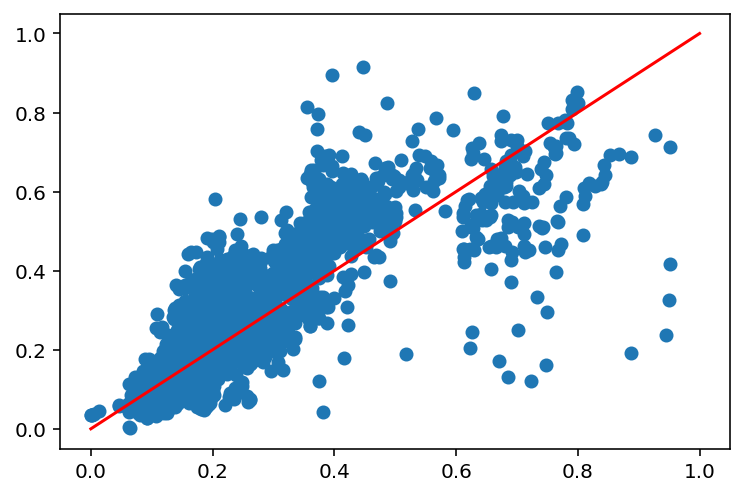

In [79]:
plt.plot([0,1],[0,1], c='r')
plt.scatter(DT_df['s'], DTS_ext)

In [ ]:
def DTS_extended_sensitivity_analysis(df1_transf, term=[1,1,1,1,1,1,1,1,1,1,1,1]):
  a,b,c,d,e,f,g,h,i,j,k,l = term

  GR = df1_transf['GR'].astype(float)
  RHOB = df1_transf['RHOB'].astype(float)
  NPHI = df1_transf['NPHI'].astype(float)
  RACELM = df1_transf['RACELM'].astype(float)
  PEF = df1_transf['NPHI'].astype(float)
  RPCELM = df1_transf['RPCELM'].astype(float)
  CALI = df1_transf['CALI'].astype(float)
  ROP = df1_transf['ROP'].astype(float)
  DRHO = df1_transf['DRHO'].astype(float)

  # Weights
  w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20 = 0.9692,	-0.7301,	0.7516,	1.4647,	0.9964,	0.1425,	1.8056,	39.0119,	-1.5550,	2.3382,	1.5743,	0.5369,	1.1624,	-1.4585,	-0.8881,	1.3855,	0.4326,	0.8925,	2.7454,	1.288151188

  a=(w1*1.1572840756852)**a
  b=((w20*0.621609968270664)**(w2*RPCELM))**b
  c=((w3*PEF**GR))**c
  d=(abs(w4*NPHI))**d
  e=((np.cos(w5*CALI)**(w6*CALI)))**e
  f=(np.cos(w9*CALI)**((w10*RPCELM)**(w11*PEF)))**f
  g=(np.cos(w12*GR))**g
  h=((np.cos(w13*NPHI)**(w19*GR)))**h
  i=(np.cos(w14*RHOB)**(w15*NPHI))**i
  j=(np.cos(w16*RHOB)**(w7*NPHI**((w17*GR)**(w18*NPHI))))**j
  k=(np.sign(GR))**k
  l=(np.sign(ROP))**l

  DTS1 = a*b*c*d*e*f*g*h*i*j*k*l
  return DTS1

In [ ]:
term = np.full(12,1)

# Sensitivity analysis of whole eqn
DT_full_pred = DTS_extended_sensitivity_analysis(DT_df, term=term)
DT_actu = DT_df['s']
r2 = r2_score(DT_actu, DT_full_pred)
mape = mean_absolute_percentage_error(DT_actu, DT_full_pred)
bias = bias_score(DT_actu, DT_full_pred)
si = SI_score(DT_actu, DT_full_pred)
# print(r2, mape, bias, si)

full_sens_df = pd.DataFrame({'Term': ['Full'], 'R2': [r2], 'MAPE': [mape], 'Bias': [bias], 'SI': [si]})


eqn = [
  'w1*1.1572840756852',
  '(w20*0.621609968270664)**(w2*RPCELM)',
  '(w3*PEF**GR)',
  'abs(w4*NPHI)',
  '(np.cos(w5*CALI)**(w6*CALI))',
  'np.cos(w9*CALI)**((w10*RPCELM)**(w11*PEF))',
  'np.cos(w12*GR)',
  '(np.cos(w13*NPHI)**(w19*GR))',
  'np.cos(w14*RHOB)**(w15*NPHI)',
  'np.cos(w16*RHOB)**(w7*NPHI**((w17*GR)**(w18*NPHI)))',
  'np.sign(GR)',
  'np.sign(ROP)'
]

R2 = []
MAPE = []
Bias = []
SI = []

for i in range(len(term)):
  t = term.copy()
  t[i] = 0

  DT_pred = DTS_extended_sensitivity_analysis(DT_df, term=t)
  DT_actu = DT_df['s']
  r2 = r2_score(DT_actu, DT_pred)
  mse = mean_squared_error(DT_actu, DT_pred)
  mape = mean_absolute_percentage_error(DT_actu, DT_pred)
  rmse = np.sqrt(mse)
  bias = bias_score(DT_actu, DT_pred)
  si = SI_score(DT_actu, DT_pred)

  R2.append(r2)
  MAPE.append(mape)
  Bias.append(bias)
  SI.append(si)

sens_df = pd.DataFrame({'Term': eqn, 'R2': R2, 'MAPE': MAPE, 'Bias': Bias, 'SI': SI})
result_df = pd.concat((full_sens_df, sens_df))

result_df

,Term,R2,MAPE,Bias,SI
0,Full,0.621762,898.835540,0.010707,1.144660e-14
0,w1*1.1572840756852,0.678259,801.377573,-0.015086,7.455174e-15
1,(w20*0.621609968270664)**(w2*RPCELM),0.622949,888.088185,0.010212,5.249742e-15
2,(w3*PEF**GR),-0.457679,1303.087970,0.101812,1.233960e-14
3,abs(w4*NPHI),-7.924871,9672.303910,0.373912,1.495094e-14
4,(np.cos(w5*CALI)**(w6*CALI)),0.612982,913.996162,0.013191,5.466226e-15
5,np.cos(w9*CALI)**((w10*RPCELM)**(w11*PEF)),0.595602,1401.594672,0.030110,6.386284e-15
6,np.cos(w12*GR),0.619674,898.961199,0.010927,3.436687e-15
7,(np.cos(w13*NPHI)**(w19*GR)),0.425557,899.062584,0.019802,2.164842e-16
8,np.cos(w14*RHOB)**(w15*NPHI),0.640464,870.015314,-0.001384,3.355505e-15
